In [2]:
# HW-8

# The data-set used in this homework is organized as follows:
#. 110
#. | - 110-m-r
#  | - 110-m-d
#. | - 110-f-r
#  | - 110-f-d
# where m -> males, f -> females, r -> republican, d -> democrat
# To further understand the scale of topics, let's visualize
# the scale of data and get more insights into things

import os
import pandas

my_path = '/Users/rajyalakshmigollakota/Downloads/110/'


# Create a dict to append to the data-frame 
dir_count_dict = {}
df_dir_count = pandas.DataFrame(dir_count_dict, columns=['DirName', 'NumFiles'])

for _dir in os.listdir(my_path):
    count = 0
    try:
        for _file in os.listdir(my_path + _dir):
            count += 1
        dir_count_dict = {'DirName': _dir, 'NumFiles': count}
        df_dir_count = df_dir_count.append(dir_count_dict, ignore_index=True)
    except NotADirectoryError:
        pass

df_dir_count.head()

/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DirName,NumFiles
0,110-f-d,50
1,110-m-r,159
2,110-f-r,18
3,110-m-d,202


/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='DirName', ylabel='NumFiles'>

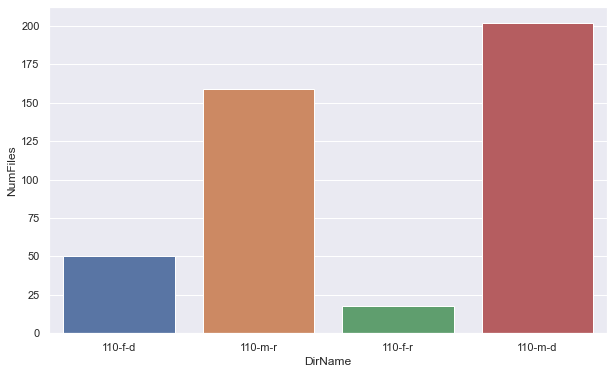

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.figure(figsize=(10,6))
sns.barplot(x='DirName', y='NumFiles', data=df_dir_count)

In [4]:
# Based on file-counts, let's analyze the data-set in 110-f-d
# and do some topic modelling
import pandas 
import re
import csv

# Write the contents of text into a csv
MyFILE=open('110-f-d.csv', 'w')

### Place the column names in - write to the first row
WriteThis="DOCNO;TEXT\n"
MyFILE.write(WriteThis)
MyFILE.close()

# Open the file for append
MyFILE=open("110-f-d.csv", "a")

# Read the contents of the first document
NUMFILES = 10
_count = 0

while _count < NUMFILES:
    for _file in os.listdir(my_path + '110-f-d'):
        read_lines = False
        text = ''
        filename = my_path + '110-f-d/' + _file
        with open(filename, 'r') as input:
            for line in input:
                if 'DOCNO' in line:
                    line = re.sub(r'<.?DOCNO>', '', line)
                    title = line.strip()
                if '<TEXT>' in line:
                    read_lines = True
                    continue
                if '</TEXT>' in line:
                    print(title, text)
                    read_lines = False
                    break
                if read_lines:
                    text += line.strip()
        writer = csv.writer(MyFILE, delimiter = ";")
        writer.writerow([title, text])
    _count += 1
    
# CLOSE THE FILE
MyFILE.close()

Mrs. JONES of Ohio. (PERSONAL EXPLANATION -- (House of Representatives - January 29, 2008)) Mrs. JONES of Ohio. Madam Speaker, due to events scheduled in my district, I will miss votes on January 29, 2008. Please let the Record reflect that had I been present, my vote would have reflected the following:H.R. 5140 Recovery Rebates and Economic Stimulus for the American People Act of 2008--``yea.''H.R. 1528 New England National Scenic Trail Designation Act--``aye.''H.R. 933 Commending the Louisiana State University Tigers Football Team--``yea.''
Ms. ROS-LEHTINEN. (TOM LANTOS AND HENRY J. HYDE UNITED STATES GLOBAL LEADERSHIP AGAINST HIV/AIDS, TUBERCULOSIS, AND MALARIA REAUTHORIZATION ACT OF 2008 -- (House of Representatives - July 24, 2008)) Ms. ROS-LEHTINEN. Mr. Speaker, I yield myself such time as I may consume.Mr. Speaker, many of us seek a place in this hallowed institution to serve our country and our constituents, to make a difference, to help change the world for the better. Mr. Spe

/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df = pandas.read_csv('110-f-d.csv', delimiter=';')
df.head()

/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DOCNO,TEXT
0,Mrs. JONES of Ohio. (PERSONAL EXPLANATION -- (...,"Mrs. JONES of Ohio. Madam Speaker, due to even..."
1,Ms. ROS-LEHTINEN. (TOM LANTOS AND HENRY J. HYD...,"Ms. ROS-LEHTINEN. Mr. Speaker, I yield myself ..."
2,Ms. WATERS. (PROVIDING FOR CONSIDERATION OF SE...,Ms. WATERS. I truly thank the gentleman from F...
3,Mrs. DAVIS of California. (PROVIDING FOR CONSI...,"Mrs. DAVIS of California. Madam Speaker, I ris..."
4,Mrs. NAPOLITANO. (PASSENGER RAIL INVESTMENT AN...,"Mrs. NAPOLITANO. Mr. Chairman, I want to thank..."


In [6]:
# Let's examine the shape of the dataframe
df.shape

/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(500, 2)

In [7]:
# Let's process the dataframe by parsing the TEXT column
# and running it through stages: Tokenize -> Vectorize

# Step-1: Tokenize
TEXTLIST = []

for row_text in df['TEXT']:
    TEXTLIST.append(row_text)

print(TEXTLIST)

["Mrs. JONES of Ohio. Madam Speaker, due to events scheduled in my district, I will miss votes on January 29, 2008. Please let the Record reflect that had I been present, my vote would have reflected the following:H.R. 5140 Recovery Rebates and Economic Stimulus for the American People Act of 2008--``yea.''H.R. 1528 New England National Scenic Trail Designation Act--``aye.''H.R. 933 Commending the Louisiana State University Tigers Football Team--``yea.''", "Ms. ROS-LEHTINEN. Mr. Speaker, I yield myself such time as I may consume.Mr. Speaker, many of us seek a place in this hallowed institution to serve our country and our constituents, to make a difference, to help change the world for the better. Mr. Speaker, today we are given an opportunity to edge ever closer to the accomplishment of these goals.Today we have an opportunity to positively impact the lives of countless human beings worldwide by recommitting ourselves to fighting and eliminating a great threat to our international sec

/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Step-2: Vectorize
def preprocess_text(text):
    '''
    Remove numbers from feature names
    '''
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    return text

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

MyCountV=CountVectorizer(input="content", preprocessor=preprocess_text, lowercase=True, 
                         stop_words = "english")

MyDTM = MyCountV.fit_transform(TEXTLIST)  # create a sparse matrix

# vocab is a vocabulary list
vocab = MyCountV.get_feature_names()  # change to a list

MyDTM = MyDTM.toarray()  # convert to a regular array

print(list(vocab)[10:20])

ColumnNames = MyCountV.get_feature_names()

MyDTM_DF = pandas.DataFrame(MyDTM, columns=ColumnNames)

print(MyDTM_DF)

['abrahamic', 'abroad', 'absolute', 'absolutely', 'abstinence', 'abu', 'abundance', 'abuse', 'abuses', 'academy']
     aarp  abandon  abandoned  abet  abhorrent  ability  able  abolish  \
0       0        0          0     0          0        0     0        0   
1       0        0          0     0          0        1     0        0   
2       0        0          0     0          0        0     0        0   
3       0        0          0     0          0        0     0        0   
4       0        0          0     0          0        0     1        0   
..    ...      ...        ...   ...        ...      ...   ...      ...   
495     0        0          0     0          0        0     0        0   
496     0        0          0     0          0        0     0        0   
497     0        0          0     0          0        0     0        0   
498     0        0          0     0          0        0     0        0   
499     0        0          0     0          0        0     0        0  

/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Let's run the LDA model
num_topics = 5
lda_model_DH = LatentDirichletAllocation(n_components=num_topics, max_iter=100, 
                                         learning_method='online')

LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)
print("SIZE: ", LDA_DH_Model.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

print("LDA Model:")
print_topics(lda_model_DH, MyCountV)

/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SIZE:  (500, 5)
LDA Model:
Topic 0:
[('speaker', 305.4112687534301), ('million', 281.98426893560736), ('support', 279.46099827758513), ('act', 278.7444288544162), ('families', 246.2248770597216), ('year', 235.68230214921647), ('billion', 231.32191853758368), ('today', 224.1610117337662), ('years', 220.00057959405564), ('madam', 216.29016560247294)]
Topic 1:
[('hiv', 432.1392775678587), ('aids', 391.17500936770864), ('mr', 300.4086664394164), ('health', 261.3976870037237), ('people', 250.60645951750695), ('speaker', 230.39846803986103), ('million', 200.86053277509504), ('world', 191.06086660347938), ('support', 180.96583616885692), ('legislation', 160.73385295492443)]
Topic 2:
[('aids', 169.5145897803903), ('hiv', 159.5536487971826), ('health', 130.32835098585494), ('african', 129.66428994839293), ('care', 120.32943596042138), ('children', 119.81108788190444), ('women', 109.89780364766006), ('americans', 99.96672577342488), ('child', 79.90930478206413), ('percent', 79.88764475407983)]
T

In [ ]:
# Finally, let's visualize the topics

# Visualization-1: Word-clouds/Topic-clouds for 5-topics
import matplotlib.pyplot as plt
import numpy as np

word_topic = np.array(lda_model_DH.components_)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

fontsize_base = 40 / np.max(word_topic) # font size for word with largest share in corpus

for t in range(num_topics):
    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base*share)

plt.tight_layout()
plt.show()

# Based on the cloud, the topics seem to be following:
# - Topic#0: aids/hv
# - Topic#1: children
# - Topic#2: Oil
# - Topic#3: Florida
# - Topic#4: Foreign investment

In [ ]:
# Visualization-2: Using the LDA-Vis
# ! pip3 install pyLDAvis
import pyLDAvis.sklearn as LDAvis
import pyLDAvis
import numpy as np

pyLDAvis.enable_notebook()
panel = LDAvis.prepare(lda_model_DH, np.matrix(MyDTM), MyCountV, mds='tsne')
pyLDAvis.show(panel, local=False)

/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/rajyalakshmigollakota/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [06/Dec/2021 12:38:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2021 12:38:30] code 404, message Not Found
127.0.0.1 - - [06/Dec/2021 12:38:30] "GET /favicon.ico HTTP/1.1" 404 -
